In [1]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import copy
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib as mpl
#import collections
import matplotlib.ticker as mticker
from matplotlib import ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
import os
import eofs.standard as Eof_st
from eofs.multivariate.standard import MultivariateEof

from scipy.signal import butter, lfilter
from scipy.signal import convolve

import utilities

import importlib
def reimport_module(module_name):
    """
    Reimports the specified Python module.
    
    Args:
    module_name (module): The module to be reimported, typically passed as a variable.
    
    Returns:
    module: The reloaded module.
    """
    try:
        # Reload the already imported module
        reloaded_module = importlib.reload(module_name)
        print(f"Module {module_name.__name__} reloaded successfully.")
        return reloaded_module
    except Exception as e:
        print(f"Failed to reload module: {e}")

reimport_module(utilities)

Module utilities reloaded successfully.


<module 'utilities' from '/glade/work/wchapman/For_Meg/CMJO_Diagnostics_Tool/utilities.py'>

## Bootstrap?

In [2]:
bootstrap=False
if bootstrap:
    from xbootstrap import block_bootstrap

## Files_in

In [10]:
print(f'You are required to run the 13_Generate_EOFS routine before this one...')

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '/glade/derecho/scratch/wchapman/ADF/ERA5_data/ts/climo'

# filolr =  'ERA5.h1.FLUT.anomalies.1979010100000-1993123100000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'ERA5.h1.U850.anomalies.1979010100000-1993123100000.nc'
# var_name_u850 = 'U850'
# filv850 = 'ERA5.h1.V850.anomalies.1979010100000-1993123100000.nc'
# var_name_v850 = 'V850'
# filu200 = 'ERA5.h1.U200.anomalies.1979010100000-1993123100000.nc' 
# var_name_u200 = 'U200'
# filz500 = 'ERA5..h1.Z500.anomalies.1979010100000-1993123100000.nc'
# var_name_z500 = 'Z500'
# z500_factor=1

# phases_in = 'ERA5.h1.MJO_EOFS_FLUT_U200_U850.nc'

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '//glade/derecho/scratch/wchapman/ADF/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006/ts/climo/'
# filolr =  'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006.cam.h1a.FLUT.anomalies.0001010200000-0012122400000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006.cam.h1a.U850.anomalies.0001010200000-0012122400000.nc'
# var_name_u850 = 'U850'
# filu200 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006.cam.h1a.U200.anomalies.0001010200000-0012122400000.nc' 
# var_name_u200 = 'U200'
# filv850 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006.cam.h1a.V850.anomalies.0001010200000-0012122400000.nc'
# var_name_v850 = 'V850'
# filz500 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006.cam.h1a.Z500.anomalies.0001010200000-0012122400000.nc'
# var_name_z500 = 'Z500'
# z500_factor=9.81

# phases_in = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006.cam.h1a.MJO_EOFS_FLUT_U200_U850.nc'


###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '//glade/derecho/scratch/wchapman/ADF/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006/ts/climo/'
# filolr =  'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006.cam.h1a.FLUT.anomalies.0001010200000-0012122400000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006.cam.h1a.U850.anomalies.0001010200000-0012122400000.nc'
# var_name_u850 = 'U850'
# filu200 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006.cam.h1a.U200.anomalies.0001010200000-0012122400000.nc' 
# var_name_u200 = 'U200'
# filv850 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006.cam.h1a.V850.anomalies.0001010200000-0012122400000.nc'
# var_name_v850 = 'V850'
# filz500 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006.cam.h1a.Z500.anomalies.0001010200000-0012122400000.nc'
# var_name_z500 = 'Z500'
# z500_factor=9.81

# phases_in = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006.cam.h1a.MJO_EOFS_FLUT_U200_U850.nc'

###########################################################################

dir_in = '//glade/derecho/scratch/wchapman/ADF/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006/ts/climo/'
filolr =  'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.FLUT.anomalies.0001010200000-0011121700000.nc'
var_name_olr = 'FLUT'
filu850 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.U850.anomalies.0001010200000-0011121700000.nc'
var_name_u850 = 'U850'
filu200 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.U200.anomalies.0001010200000-0011121700000.nc' 
var_name_u200 = 'U200'
filv850 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.V850.anomalies.0001010200000-0011121700000.nc'
var_name_v850 = 'V850'
filz500 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.Z500.anomalies.0001010200000-0011121700000.nc'
var_name_z500 = 'Z500'
z500_factor=9.81

phases_in = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.MJO_EOFS_FLUT_U200_U850.nc'

dir_out = f'{dir_in}/mjo_diag/'
# Check if the directory exists
if not os.path.exists(dir_out):
    # Create the directory
    os.makedirs(dir_out)
    print(f"Directory {dir_out} created.")
    
save_Fig_out = f'{dir_out}/{filolr.split("h1")[0]}h1.MJO_COMPOSITE_EOFS_{var_name_olr}_{var_name_u200}_{var_name_u850}.png'
save_Fig_out_2 = f'{dir_out}/{filolr.split("h1")[0]}h1.MJO_COMPOSITE_234_567_EOFS_{var_name_olr}_{var_name_u200}_{var_name_u850}.png'
print(f'saving figure to {save_Fig_out}')
save_NC_out = f'{dir_out}/{filolr.split("h1")[0]}h1.MJO_Bootstrapped_COMPOSITE_EOFS_{var_name_olr}_{var_name_u200}_{var_name_u850}.nc'
print(f'saving figure to {save_NC_out}')
save_NPZ_out = f'{dir_out}/{filolr.split("h1")[0]}h1.MJO_Bootstrapped_COMPOSITE_234_567_EOFS_{var_name_olr}_{var_name_u200}_{var_name_u850}.npz'
print(f'saving figure to {save_NPZ_out}')

You are required to run the 13_Generate_EOFS routine before this one...
saving figure to //glade/derecho/scratch/wchapman/ADF/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006/ts/climo//mjo_diag//FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1.MJO_COMPOSITE_EOFS_FLUT_U200_U850.png
saving figure to //glade/derecho/scratch/wchapman/ADF/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006/ts/climo//mjo_diag//FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1.MJO_Bootstrapped_COMPOSITE_EOFS_FLUT_U200_U850.nc
saving figure to //glade/derecho/scratch/wchapman/ADF/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006/ts/climo//mjo_diag//FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOut

## Read in Data

In [13]:
# precip: 
file_path_olr = os.path.join(dir_in, filolr)  # Join the directory and file name
DS_olr = xr.open_dataset(file_path_olr)

# u850: 
file_path_u850 = os.path.join(dir_in, filu850)  # Join the directory and file name
DS_u850 = xr.open_dataset(file_path_u850)

# v850: 
file_path_v850 = os.path.join(dir_in, filv850)  # Join the directory and file name
DS_v850 = xr.open_dataset(file_path_v850)

# DS_phases
file_path_phases = os.path.join(dir_out, phases_in)  # Join the directory and file name
DS_phases = xr.open_dataset(file_path_phases)

#create cosine latitude weighting: 
weights = np.cos(np.deg2rad(DS_u200.lat))

## Filter the data:

In [16]:
# Define bandpass frequency limits
f_low = 100  # Corresponds to  days period
f_high = 20   # Corresponds to 20 days period

print('... starting filtering ...')
u850_f = utilities.bandpass_filter_via_fft_3d(np.array(DS_u850[var_name_u850]), f_high, f_low, sampling_interval = 1)
DS_u850['U850_f'] = (('time', 'lat', 'lon'), u850_f)
print('filt u850')
v850_f = utilities.bandpass_filter_via_fft_3d(np.array(DS_v850[var_name_v850]), f_high, f_low, sampling_interval = 1)
DS_v850['V850_f'] = (('time', 'lat', 'lon'), v850_f)
print('filt v850')
olr_f = utilities.bandpass_filter_via_fft_3d(np.array(DS_olr[var_name_olr]), f_high, f_low, sampling_interval = 1)
DS_olr['OLR_f'] = (('time', 'lat', 'lon'), olr_f)
print('filt OLR')

olr = DS_olr['OLR_f']
# u200 = DS_u200['U200_f']
u850 = DS_u850['U850_f']
v850 = DS_v850['V850_f']

... starting filtering ...
filt u850
filt v850
filt OLR


## Wintertime Baby!

In [17]:
NDFJMA_u850 = DS_u850.where((DS_u850['time.month'] >= 11) | (DS_u850['time.month'] <= 5), drop=True)
NDFJMA_v850 = DS_v850.where((DS_v850['time.month'] >= 11) | (DS_v850['time.month'] <= 5), drop=True)
NDFJMA_olr = DS_olr.where((DS_olr['time.month'] >= 11) | (DS_olr['time.month'] <= 5), drop=True)
NDFJMA_phases = DS_phases.where((DS_phases['time.month'] >= 11) | (DS_phases['time.month'] <= 5), drop=True)

## Winter time baby

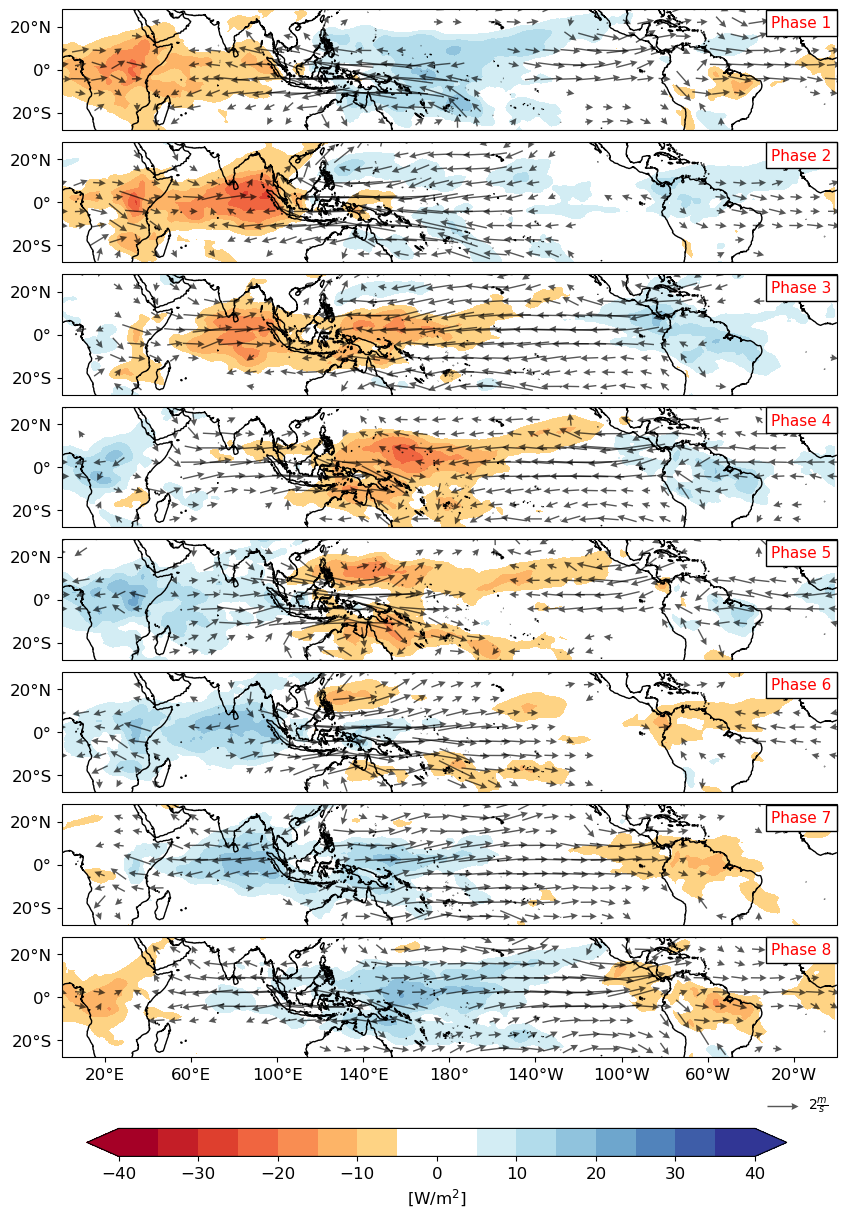

In [18]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)

if var_name_olr == 'FLUT':
    clevs = np.arange(-40, 45, 5)
    bluey = mpl.cm.get_cmap('RdYlBu', len(clevs))
    newcolors = bluey(np.linspace(0, 1, len(clevs)))
    nnn = int(np.floor(newcolors.shape[0]/2))
    newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
    newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
    newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
    cmapzzz = ListedColormap(newcolors)
    cbar_lab ='[W/m$^2$]'
    pf_scale = 1
elif var_name_olr == 'VP200':
    clevs = np.arange(-60, 65, 5)
    bluey = mpl.cm.get_cmap('RdYlBu', len(clevs))
    newcolors = bluey(np.linspace(0, 1, len(clevs)))
    nnn = int(np.floor(newcolors.shape[0]/2))
    newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
    newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
    newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
    cmapzzz = ListedColormap(newcolors)
    pf_scale = 10e-6
    cbar_lab ='10e6*[m$^2$ s$^-1$]'
else:
    clevs = np.arange(-40, 45, 5)
    bluey = mpl.cm.get_cmap('RdYlBu', len(clevs))
    newcolors = bluey(np.linspace(0, 1, len(clevs)))
    nnn = int(np.floor(newcolors.shape[0]/2))
    newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
    newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
    newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
    cmapzzz = ListedColormap(newcolors)
    pf_scale = 1
    cbar_lab ='[W/m$^2$]'

#begin fig
fig = plt.figure(figsize=(10, 14))  # Adjusted figure size for 8 panels
proj = ccrs.PlateCarree(central_longitude=180)

lvlv = 1000
varvar = 'Nudge_U'
varvarm = 'NDJFM_U'
for phs in range(1,9):
    inds = np.where(NDFJMA_phases['RMMphase_obs']==phs)[0]
    
    ax = plt.subplot(8, 1, phs, projection=proj)  # Dynamic subplot creation
    ax.coastlines('50m')

    v = NDFJMA_v850.isel(time=inds).mean('time')['V850_f']
    u = NDFJMA_u850.isel(time=inds).mean('time')['U850_f']
    pfield = NDFJMA_olr.isel(time=inds).mean('time')['OLR_f']
    pfield = pfield*pf_scale 
    # Apply the mask: Replace vectors with small magnitudes with NaNs
    mask = np.sqrt(u**2 + v**2) < .5
    u = np.where(mask, np.nan, u)
    v = np.where(mask, np.nan, v)

    lon, lat = np.meshgrid(pfield['lon'].values, pfield['lat'].values)

    # Subsampling for quiver plot clarity
    skip = (slice(None, None, 7), slice(None, None, 7))
    
    # Plotting
    bb = ax.contourf(lon - 180, lat, pfield, levels=clevs, cmap=cmapzzz, transform=proj, extend='both')
    q = ax.quiver(lon[skip], lat[skip], u[skip], v[skip],pivot="middle", transform=ccrs.PlateCarree(),
                  color='black', scale=50, alpha=0.66,linewidths=0.01, width=0.0018,headwidth=5)

    # place a text box in upper left in axes coords
    if phs == 8:
        qk = ax.quiverkey(q, 0.95, -.4, 2, r'$2 \frac{m}{s}$', labelpos='E',
                       transform=ax.transAxes, color='black')

    # Set ticks, labels, and title dynamically
    if phs == 8:
        ax.set_xticks([20, 60, 100, 140, 180, 220, 260, 300, 340], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    else:
        ax.set_xticks([], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    
    ax.set_yticks(np.arange(-60, 70, 20), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.tick_params(labelsize=12)
    ax.set_extent([0, 360, -28, 28], crs=ccrs.PlateCarree())
    props = dict(facecolor='white', alpha=1)
    ax.text(.993, 0.95, f'Phase {phs}', color='red', transform=ax.transAxes, fontsize=11, verticalalignment='top'
            , horizontalalignment='right', bbox=props)

# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(bb, cax=cbar_ax, orientation='horizontal', label='[m/d]')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=cbar_lab,fontsize=12)
fig.subplots_adjust(hspace=-.12)  # Adjust spacing as needed
plt.savefig(save_Fig_out,bbox_inches='tight',dpi=400)
plt.show()


## This is broken without xbootstrap

done1
done1


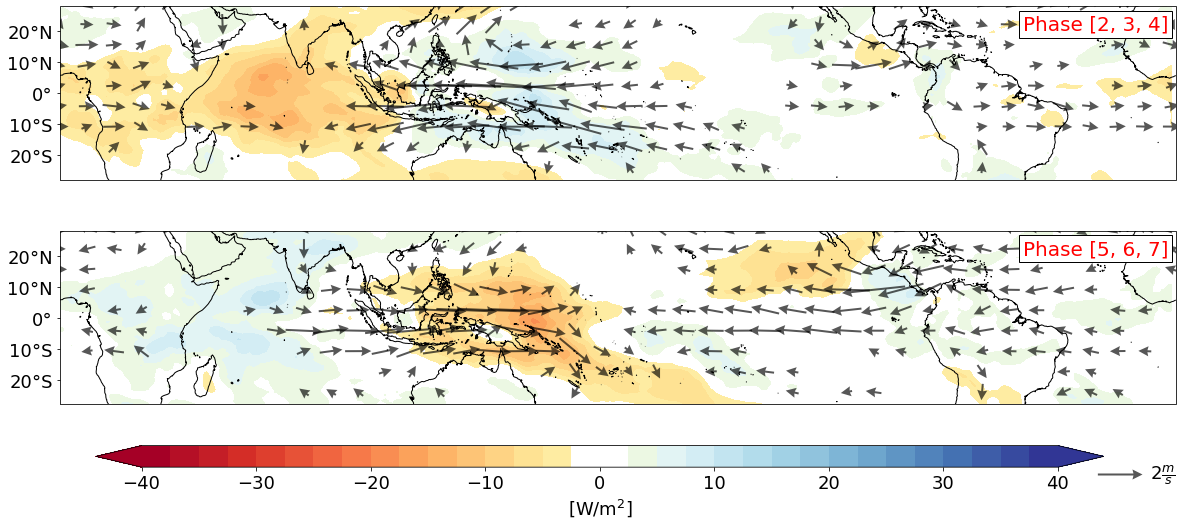

In [8]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)

if var_name_olr == 'FLUT':
    clevs = np.arange(-40, 42.5, 2.5)
    bluey = mpl.cm.get_cmap('RdYlBu', len(clevs))
    newcolors = bluey(np.linspace(0, 1, len(clevs)))
    nnn = int(np.floor(newcolors.shape[0]/2))
    newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
    newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
    newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
    cmapzzz = ListedColormap(newcolors)
    cbar_lab ='[W/m$^2$]'
    pf_scale = 1
elif var_name_olr == 'VP200':
    clevs = np.arange(-60, 65, 5)
    bluey = mpl.cm.get_cmap('RdYlBu', len(clevs))
    newcolors = bluey(np.linspace(0, 1, len(clevs)))
    nnn = int(np.floor(newcolors.shape[0]/2))
    newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
    newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
    newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
    cmapzzz = ListedColormap(newcolors)
    pf_scale = 10e-6
    cbar_lab ='10e6*[m$^2$ s$^-1$]'
else:
    clevs = np.arange(-40, 45, 5)
    bluey = mpl.cm.get_cmap('RdYlBu', len(clevs))
    newcolors = bluey(np.linspace(0, 1, len(clevs)))
    nnn = int(np.floor(newcolors.shape[0]/2))
    newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
    newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
    newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
    cmapzzz = ListedColormap(newcolors)
    pf_scale = 1
    cbar_lab ='[W/m$^2$]'

#begin fig
fig = plt.figure(figsize=(20, 15))  # Adjusted figure size for 8 panels
proj = ccrs.PlateCarree(central_longitude=180)

lvlv = 1000
varvar = 'Nudge_U'
varvarm = 'NDJFM_U'


svout = np.zeros([2,3,192,288])

for ee, phs in enumerate([[2,3,4],[5,6,7]]):
    inds = np.where(np.isin(NDFJMA_phases['RMMphase_obs'], phs))[0]
    
    ax = plt.subplot(2, 1, ee+1, projection=proj)  # Dynamic subplot creation
    ax.coastlines('50m')

    v = NDFJMA_v850.isel(time=inds).mean('time')['V850_f']
    u = NDFJMA_u850.isel(time=inds).mean('time')['U850_f']
    pfield = NDFJMA_olr.isel(time=inds).mean('time')['OLR_f']
    pfield = pfield*pf_scale 
    # Apply the mask: Replace vectors with small magnitudes with NaNs
    mask = np.sqrt(u**2 + v**2) < .5
    u = np.where(mask, np.nan, u)
    v = np.where(mask, np.nan, v)

    lon, lat = np.meshgrid(pfield['lon'].values, pfield['lat'].values)

    svout[ee,0,:,:] = u
    svout[ee,1,:,:] = v
    svout[ee,2,:,:] = pfield

    # Subsampling for quiver plot clarity
    skip = (slice(None, None, 7), slice(None, None, 7))
    
    # Plotting
    bb = ax.contourf(lon - 180, lat, pfield, levels=clevs, cmap=cmapzzz, transform=proj, extend='both')
    q = ax.quiver(lon[skip], lat[skip], u[skip], v[skip],pivot="middle", transform=ccrs.PlateCarree(),
                  color='black', scale=50, alpha=0.66,linewidths=0.01, width=0.0018,headwidth=5)

    # place a text box in upper left in axes coords
    if ee == 1:
        qk = ax.quiverkey(q, 0.97, -.4, 2, r'$2 \frac{m}{s}$', labelpos='E',
                       transform=ax.transAxes, color='black',fontproperties={'size':18})

    # Set ticks, labels, and title dynamically
    if ee == 2:
        ax.set_xticks([20, 60, 100, 140, 180, 220, 260, 300, 340], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    else:
        ax.set_xticks([], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    
    ax.set_yticks(np.arange(-60, 70, 10), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.tick_params(labelsize=18)
    ax.set_extent([0, 360, -28, 28], crs=ccrs.PlateCarree())
    props = dict(facecolor='white', alpha=1)
    ax.text(.993, 0.95, f'Phase {phs}', color='red', transform=ax.transAxes, fontsize=20, verticalalignment='top'
            , horizontalalignment='right', bbox=props)

    DNN = NDFJMA_olr.isel(time=inds).sel(lat=slice(-15,15),lon=slice(30,220))
    
    DNN_bs = block_bootstrap(
            DNN['OLR_f'],
            blocks={"time": 5},
            n_iteration=500,
            circular=True,
        )
    
    DNN_bs = DNN_bs.mean(['time'])
    DNN_bs_quantile50 = DNN_bs.quantile(q=.5, dim='iteration').to_dataset(name='OLR_f_mean_q50')
    DNN_bs_quantile95 = DNN_bs.quantile(q=.95, dim='iteration').to_dataset(name='OLR_f_mean_q95')
    DNN_bs_quantile99 = DNN_bs.quantile(q=.99, dim='iteration').to_dataset(name='OLR_f_mean_q99')
    DNN_bs_quantile05 = DNN_bs.quantile(q=.05, dim='iteration').to_dataset(name='OLR_f_mean_q05')
    DNN_bs_quantile01 = DNN_bs.quantile(q=.01, dim='iteration').to_dataset(name='OLR_f_mean_q01')
    DNN_bs_quantile10 = DNN_bs.quantile(q=.1, dim='iteration').to_dataset(name='OLR_f_mean_q10')
    DNN_bs_quantile90 = DNN_bs.quantile(q=.9, dim='iteration').to_dataset(name='OLR_f_mean_q90')
    DNN_bs = xr.merge([DNN_bs_quantile50, DNN_bs_quantile01, DNN_bs_quantile05, 
                                            DNN_bs_quantile99,
                                            DNN_bs_quantile95,DNN_bs_quantile10,
                                            DNN_bs_quantile90], compat='override')
    print('done1')
    DNN_bs.to_netcdf(f'{save_NC_out.split(".nc")[0]}_{ee:03}.nc')

# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.15, 0.26, 0.7, 0.02])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(bb, cax=cbar_ax, orientation='horizontal', label='[m/d]')
cbar.ax.tick_params(labelsize=18)
cbar.set_label(label=cbar_lab,fontsize=18)
fig.subplots_adjust(hspace=-.62)  # Adjust spacing as needed
plt.savefig(save_Fig_out_2,bbox_inches='tight',dpi=400)
np.savez(save_NPZ_out,svout=svout,lat=lat,lon=lon)
plt.show()


## Bootstrap the OLR Field for Bias

In [9]:
# for phs in range(1,9):
#     print(f'doing phase {phs:02}')
#     inds = np.where(NDFJMA_phases['RMMphase_obs']==phs)[0]
#     pfield = NDFJMA_olr.isel(time=inds)

#     # Create 500 circularly bootstrapped resamples of ds1, ds2 and ds3
#     # using a blocksize of 5 for the time dimension and 1 for the ensemble
#     # dimension, and only bootstrapping the time dimension for ds2
#     print('.... create block ensemble ...')
#     pfield_bs = block_bootstrap(
#         pfield['OLR_f'],
#         blocks={"time": 5},
#         n_iteration=500,
#         circular=True,
#     )
#     print('....taking mean...')
#     pfield_bs_mean = pfield_bs.mean('time')
#     print('.... quantiles ....')
#     pfield_bs_mean_quantile95 = pfield_bs_mean.quantile(q=.95, dim='iteration').to_dataset(name='OLR_f_mean_q95')
#     pfield_bs_mean_quantile99 = pfield_bs_mean.quantile(q=.99, dim='iteration').to_dataset(name='OLR_f_mean_q99')
#     pfield_bs_mean_quantile05 = pfield_bs_mean.quantile(q=.05, dim='iteration').to_dataset(name='OLR_f_mean_q05')
#     pfield_bs_mean_quantile01 = pfield_bs_mean.quantile(q=.01, dim='iteration').to_dataset(name='OLR_f_mean_q01')
#     pfield_out = pfield['OLR_f'].mean('time').to_dataset(name = 'OLRf_mean')
    
#     pfield_bs_mean_quantile = xr.merge([pfield_out, pfield_bs_mean_quantile01, pfield_bs_mean_quantile05, 
#                                         pfield_bs_mean_quantile99,
#                                         pfield_bs_mean_quantile95], compat='override')

#     pfield_bs_mean_quantile.to_netcdf(f'{save_NC_out.split(".nc")[0]}_phase{phs:03}.nc')
    

In [10]:
DNN['OLR']

KeyError: 'OLR'